In [1]:
import pandas as pd


In [21]:
import matplotlib.pyplot as plt

In [3]:
# cargo el archivo para volverlo un df
df = pd.read_csv(r'D:\0_Respaldo\0_Proyectos_2024\Henry_Labs\Lab2\Baires_Accidents\Data\hechos.csv', encoding='Latin-1')

In [46]:
df.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


### Las columnas con las que trabajare son:
 *'ID', 'N_victimas, 'Fecha (year)', 'COMUNA', 'pos_x', 'pos_y', 'victima'*
 ___

## Exploracion archivo

In [4]:
df.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1.0,1/10/2016,2016.0,1.0,10.0,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1.0,1/21/2016,2016.0,1.0,21.0,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃA, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
df.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,3336.635659,7.425287
std,0.179393,1.683754,3.571309,8.639646,3060.641793,4.387050
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    float64
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    float64
 4   MM                     696 non-null    float64
 5   DD                     696 non-null    float64
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    float64
 15  XY

In [8]:
df.shape

(10493, 21)

In [48]:
df1 = df[["ID","N_VICTIMAS", "AAAA", "COMUNA", "pos x", "pos y", "VICTIMA"]]

In [49]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          696 non-null    object 
 1   N_VICTIMAS  696 non-null    float64
 2   AAAA        696 non-null    float64
 3   COMUNA      696 non-null    float64
 4   pos x       696 non-null    object 
 5   pos y       696 non-null    object 
 6   VICTIMA     696 non-null    object 
dtypes: float64(3), object(4)
memory usage: 574.0+ KB


In [50]:
df1 = df1.drop_duplicates()

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 0 to 696
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          696 non-null    object 
 1   N_VICTIMAS  696 non-null    float64
 2   AAAA        696 non-null    float64
 3   COMUNA      696 non-null    float64
 4   pos x       696 non-null    object 
 5   pos y       696 non-null    object 
 6   VICTIMA     696 non-null    object 
dtypes: float64(3), object(4)
memory usage: 43.6+ KB


### Exploracion columna 'ID'
*Esta columna es la mas sencible por que tiene el numero de identificacion del siniestro*


In [52]:
df1['ID'].describe()

count           696
unique          696
top       2016-0001
freq              1
Name: ID, dtype: object

In [53]:
df1['ID'].describe()

count           696
unique          696
top       2016-0001
freq              1
Name: ID, dtype: object

In [54]:
df1['ID'].info()


<class 'pandas.core.series.Series'>
Index: 697 entries, 0 to 696
Series name: ID
Non-Null Count  Dtype 
--------------  ----- 
696 non-null    object
dtypes: object(1)
memory usage: 10.9+ KB


In [55]:
#me aseguro que el la columna sea del tipo string
df1['ID'] = df['ID'].astype(str)

### Exploracion columna 'COMUNA'


In [57]:
df1['COMUNA'].value_counts()

COMUNA
1.0     90
4.0     76
9.0     73
8.0     65
7.0     60
3.0     45
15.0    44
13.0    40
12.0    37
14.0    35
11.0    32
10.0    29
2.0     25
5.0     22
6.0     21
0.0      2
Name: count, dtype: int64

In [63]:
#Elimino las filas que en las que las comunas son 0 ya que no existe la comuna cero ... Podria ubicarla con las cordenadas
#Pero por efectos del tiempo del laboratorio decido eliminar las columnas
df2= df1[df1['COMUNA'] !=0]

In [66]:
df2['COMUNA'].value_counts()

COMUNA
1.0     90
4.0     76
9.0     73
8.0     65
7.0     60
3.0     45
15.0    44
13.0    40
12.0    37
14.0    35
11.0    32
10.0    29
2.0     25
5.0     22
6.0     21
Name: count, dtype: int64

In [67]:
#Exploramos por valores nan
df2['COMUNA'].isna().sum()

1

In [68]:
df2 =df2.dropna()

In [69]:
#Exploramos por valores nan
df2['COMUNA'].isna().sum()

0

In [71]:
#Convierto los valores a int
df2['COMUNA'] = df2['COMUNA'].astype(int)

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          694 non-null    object 
 1   N_VICTIMAS  694 non-null    float64
 2   AAAA        694 non-null    float64
 3   COMUNA      694 non-null    int32  
 4   pos x       694 non-null    object 
 5   pos y       694 non-null    object 
 6   VICTIMA     694 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 40.7+ KB


### Exploracion columna 'N_VICTIMAS'

In [76]:
df2['N_VICTIMAS'].value_counts()

N_VICTIMAS
1.0    674
2.0     19
3.0      1
Name: count, dtype: int64

In [75]:
#Exploramos por valores nan
df2['N_VICTIMAS'].isna().sum()

0

## Grafica de los datos

In [24]:
df2 = df1[['COMUNA','Altura','N_VICTIMAS','AAAA','MM','DD']]

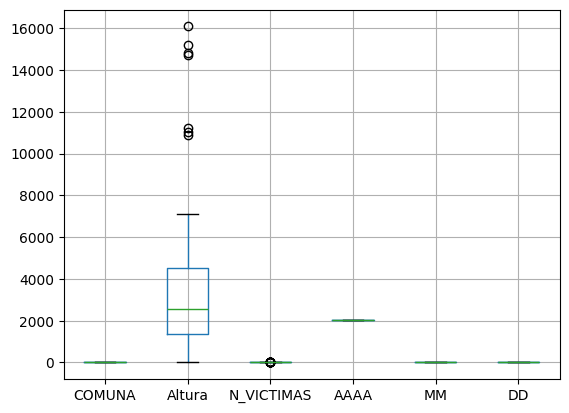

In [25]:
df2.boxplot()
plt.show()

Hay unos cuantos outlyers pero se encunentran en el limite de la ciudad.

## Normalizacion

In [26]:
dfn = df1.copy()

In [27]:
dfn.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1.0,1/10/2016,2016.0,1.0,10.0,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1.0,1/21/2016,2016.0,1.0,21.0,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃA, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
